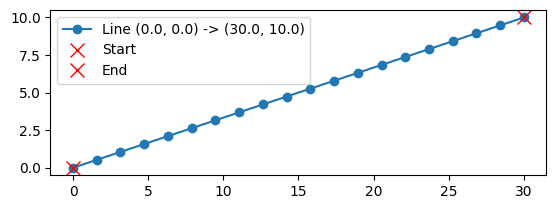

In [2]:
import ezdxf
import numpy as np
import matplotlib.pyplot as plt

def extract_line_points(dxf_file, num_points=20):
    """
    从DXF文件中提取LINE实体，并生成离散点。
    """
    doc = ezdxf.readfile(dxf_file)
    msp = doc.modelspace()
    lines_data = []

    for line in msp.query("LINE"):
        start = line.dxf.start
        end = line.dxf.end

        # 在线段上插值生成点
        xs = np.linspace(start.x, end.x, num_points)
        ys = np.linspace(start.y, end.y, num_points)
        points = list(zip(xs, ys))

        lines_data.append({
            "start": (start.x, start.y),
            "end": (end.x, end.y),
            "points": points
        })

    return lines_data


def visualize_lines(lines_data):
    """
    使用Matplotlib可视化直线的离散点，并突出显示起点和终点。
    """
    fig, ax = plt.subplots()
    for line in lines_data:
        xs, ys = zip(*line["points"])
        ax.plot(xs, ys, 'o-', label=f"Line {line['start']} -> {line['end']}")

        # 起点标记：红色圆点
        ax.plot(line["start"][0], line["start"][1], 'rx', markersize=10, label="Start")

        # 终点标记：绿色方块
        ax.plot(line["end"][0], line["end"][1], 'rx', markersize=10, label="End")

    ax.set_aspect('equal')
    ax.legend()
    plt.show()

# 示例调用
lines = extract_line_points("line.dxf", num_points=20)
visualize_lines(lines)
